In [1]:
import collections
from collections import defaultdict
import sys
import json
import random
from jsmin import jsmin
from io import StringIO
import numpy as np
import copy
import importlib
from functools import partial
import math
import os

# script_n = os.path.basename(__file__).split('.')[0]
script_n = 'syn_weight_dist_201229_diameter'

sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')
import my_plot
importlib.reload(my_plot)
from my_plot import MyPlotData

from weight_database import WeightDatabase
weightdb = WeightDatabase()

def weight_fn(syn):
    z_len = syn['z_length'] - 40
    major_axis_length = syn['major_axis_length'] * .9
    diameter = max(z_len, major_axis_length)
    diameter = int(diameter/40+.5)
    diameter *= 40
    return diameter

gzdb = '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/gen_db/mf_grc/gen_201229_setup01_syndb_threshold_20_coalesced.gz'

weightdb.load_syn_db(gzdb,
    weight_fn=weight_fn)

mpd = MyPlotData()
mpd_raw = MyPlotData()
hist = defaultdict(int)
weights_db = weightdb.get_weights()
n_syns = 0
raw_data = []
raw_data_area = []

for neuron, pc_weights in weights_db.items():
    # print(n)
    for pc, weights in pc_weights.items():
        for w in weights:
            w /= 1000
            hist[w] += 1
            n_syns += 1
            raw_data.append(w)
            area = w*w/4*3.14
            raw_data_area.append(area)
            mpd_raw.add_data_point(
                cleft_area=w)

# print(hist)
for k in sorted([k for k in hist.keys()]):
#     print(f'{k}: {hist[k]}')
    mpd.add_data_point(
        count=hist[k],
        cleft_area=k)

# mpd = mpd.to_pdf('count', cumulative=False)
mpd_cdf = mpd.to_pdf('count', cumulative=False)

print(f'n={n_syns} synapses')



n=84210 synapses


Height: 4, Aspect: 1.33


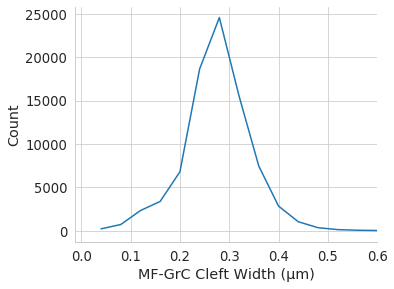

Height: 4, Aspect: 1.33


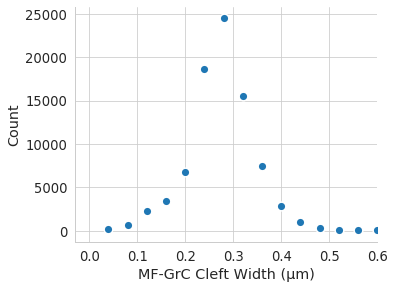

Height: 4, Aspect: 1.33


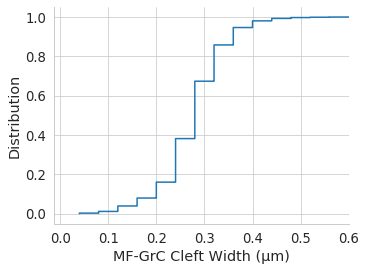

[0.02 0.06 0.1  0.14 0.18 0.22 0.26 0.3  0.34 0.38 0.42 0.46 0.5  0.54
 0.58 0.62 0.66 0.7  0.74 0.78 0.82 0.86 0.9  0.94 0.98 1.02 1.06 1.1 ]
Height: 4, Aspect: 1.33


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


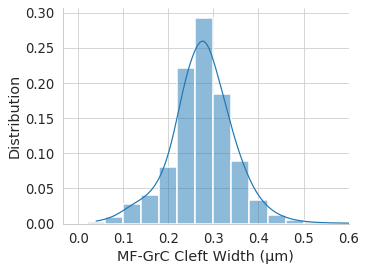

Height: 4, Aspect: 1.33


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


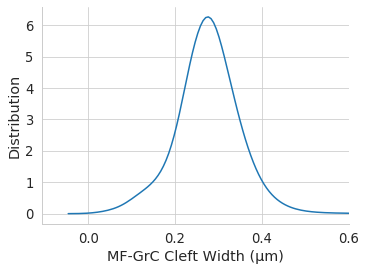

In [14]:

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x="cleft_area",
    xlim=[None, .6],
    y="count",
    kind='line',
    context='paper',
    height=4,
    y_axis_label='Count',
    x_axis_label='MF-GrC Cleft Width (µm)',
    show=True,
    save_filename=f'{script_n}.svg',
    )

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x="cleft_area",
    xlim=[None, .6],
    y="count",
    s=75,
    kind='scatter',
    context='paper',
    height=4,
    y_axis_label='Count',
    x_axis_label='MF-GrC Cleft Width (µm)',
    show=True,
    save_filename=f'{script_n}_scatter.svg',
    )

importlib.reload(my_plot); my_plot.my_displot(
    mpd_raw,
    x="cleft_area",
    # y="count",
    xlim=[None, .6],
    # s=100,
    kind='ecdf',
    context='paper',
    height=4,
    y_axis_label='Distribution',
    x_axis_label='MF-GrC Cleft Width (µm)',
    show=True,
    save_filename=f'{script_n}_ecdf.svg',
    )

# importlib.reload(my_plot); my_plot.my_displot(
#     mpd_raw,
#     x="cleft_area",
#     # y="count",
#     xlim=[None, .6],
#     # s=100,
#     kind='hist',
#     binwidth=.0399,
#     kde=True,
#     kde_kws={'bw_adjust': 3.5},
#     context='paper',
#     height=4,
#     y_axis_label='Distribution',
#     x_axis_label='Diameter (um)',
#     show=True,
#     save_filename=f'{script_n}_hist.svg',
#     )

df = mpd_raw.to_dataframe()
width = .04
bins = np.linspace(df["cleft_area"].min() - width/2, df["cleft_area"].max() + width/2, int(df["cleft_area"].max()/width)+1)
print(bins)
# df["A"].hist(bins=bins)

importlib.reload(my_plot); my_plot.my_displot(
    mpd_raw,
    x="cleft_area",
    # y="count",
    xlim=[None, .6],
    # s=100,
    kind='hist',
    # binwidth=.0399,
    bins=bins,
    kde=True,
    kde_kws={'bw_adjust': 3.5},
    stat='probability',
    context='paper',
    height=4,
    y_axis_label='Distribution',
    x_axis_label='MF-GrC Cleft Width (µm)',
    show=True,
    save_filename=f'{script_n}_hist.svg',
    )

importlib.reload(my_plot); my_plot.my_displot(
    mpd_raw,
    x="cleft_area",
    # y="count",
    xlim=[None, .6],
    # s=100,
    kind='kde',
    # discrete=True,
    bw_adjust=4,
    # kde=True,
    context='paper',
    height=4,
    y_axis_label='Distribution',
    x_axis_label='MF-GrC Cleft Width (µm)',
    show=True,
    save_filename=f'{script_n}_kde.svg',
    )




In [6]:
# calculate coefficient of variation
from scipy.stats import variation
cov = variation(raw_data)
print(f'Coefficient of variation for MF-GrC synapse width: {cov}')

Coefficient of variation for MF-GrC synapse width: 0.2510251215871829


In [5]:
# calculate coefficient of variation
from scipy.stats import variation
cov = variation(raw_data_area)
print(f'Coefficient of variation for MF-GrC synapse area: {cov}')

Coefficient of variation for MF-GrC synapse area: 0.4909063940577968


In [17]:
import compress_pickle
rawdb = compress_pickle.load(gzdb)


In [20]:
# finding small and big examples
for neuron, pc_weights in weights_db.items():
    # print(n)
    syns = rawdb[neuron]
    for pc, weights in pc_weights.items():
        for w in weights:
            w /= 1000
            if w < .5:
                continue
            pc_syns = syns[pc]
            for s in pc_syns:
                if s['major_axis_length'] > 500 and s['major_axis_length'] < 600:
                    print(s)


{'syn_loc': (90192, 106012, 187), 'syn_loc0': (360768, 424048, 7480), 'sf_pre': 7272720630532, 'sf_post': 7059550371969, 'pre_loc': (360624, 424160, 7480), 'post_loc': (360912, 423936, 7480), 'score': 1594, 'area': 1927, 'z_length': 560, 'major_axis_length': 505}
{'syn_loc': (90096, 105880, 221), 'syn_loc0': (360384, 423520, 8840), 'sf_pre': 7166055547463, 'sf_post': 7006990499939, 'pre_loc': (360384, 423648, 8840), 'post_loc': (360384, 423392, 8840), 'score': 930, 'area': 1035, 'z_length': 240, 'major_axis_length': 506}
{'syn_loc': (76456, 102492, 803), 'syn_loc0': (305824, 409968, 32120), 'sf_pre': 8831997706249, 'sf_post': 8649257124474, 'pre_loc': (305680, 409952, 32120), 'post_loc': (305968, 409984, 32120), 'score': 934, 'area': 1267, 'z_length': 400, 'major_axis_length': 578}
{'syn_loc': (76456, 102492, 803), 'syn_loc0': (305824, 409968, 32120), 'sf_pre': 8831997706249, 'sf_post': 8649257124474, 'pre_loc': (305680, 409952, 32120), 'post_loc': (305968, 409984, 32120), 'score': 934